# SVM

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys; sys.path.append('../../')
from DataPreparing.data_preparing import *
from DataPreparing.HandleClassImbalance import *
from Evaluation.evaluate import *
from sklearn import svm
import numpy as np
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE,SMOTENC,SMOTEN,BorderlineSMOTE
from imblearn.under_sampling import NearMiss,RandomUnderSampler
from sklearn.model_selection import train_test_split

# Read Data

In [3]:
X_train, X_val, y_train, y_val =read_data("../../DataFiles/embeddings_121_191_401_457.csv", endcode_labels=True)

In [4]:
print(set(y_train))

{0, 1, 2, 3}


{0: 4802, 1: 3175, 2: 1808, 3: 717}


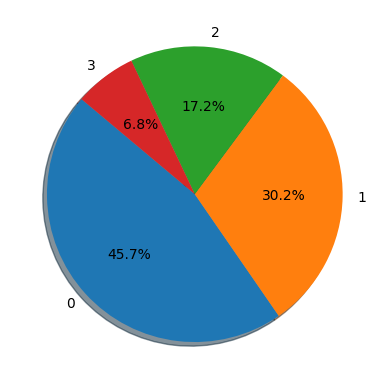

In [5]:
show_proportions(y_train)
# show the proportions of each class in the data in pie graph implementation
#don't call function implement it here
import matplotlib.pyplot as plt
unique, counts = np.unique(y_train, return_counts=True)
plt.pie(counts, labels=unique, autopct='%1.1f%%', shadow=True, startangle=140)
plt.show()



# Initial Fit

In [5]:
%%time
clf = svm.SVC( kernel='rbf')
clf.fit(X_train, y_train)
evaluate(clf, X_val,y_val , clf.predict(X_train), y_train)

Training Accurracy: 90.23043229860978%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1138
           1       0.82      0.92      0.86       838
           2       0.77      0.92      0.84       453
           3       1.00      0.04      0.08       197

    accuracy                           0.89      2626
   macro avg       0.90      0.72      0.70      2626
weighted avg       0.90      0.89      0.86      2626

CPU times: total: 9.31 s
Wall time: 10.2 s


# Hyper parameter Search

In [6]:
from scipy.stats import loguniform

c_range =loguniform(1e-5, 1e5)
gamma_range = np.linspace(0.0001, 1)
#kernels= ['linear' ,'rbf']
param_grid = {'C': c_range,
              'gamma': gamma_range,
               #'kernel' : kernels
             }

In [7]:
clf = svm.SVC( kernel='rbf')
parameter_search(X_train, y_train, clf, param_grid)


KeyboardInterrupt: 

In [6]:
%%time
clf = svm.SVC( kernel='rbf', C=  44123.82, gamma= 0.102)
clf.fit(X_train, y_train)
evaluate(clf, X_val,y_val , clf.predict(X_train), y_train)

Training Accurracy: 95.2009141115978%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1138
           1       0.91      0.96      0.93       838
           2       0.86      0.95      0.90       453
           3       0.88      0.50      0.63       197

    accuracy                           0.94      2626
   macro avg       0.91      0.85      0.87      2626
weighted avg       0.94      0.94      0.93      2626

CPU times: total: 8.16 s
Wall time: 8.49 s


# Handle Class Imbalance

In [3]:
X_sm,y_sm=handle_class_imbalance(X_train, y_train,"SMOTE",4,[1,1,1])

In [4]:
%%time
clf = svm.SVC( kernel='rbf', C=  44123.82, gamma= 0.102)
clf.fit(X_sm, y_sm)
evaluate(clf, X_val,y_val , clf.predict(X_sm), y_sm)

Training Accurracy: 91.75864223240316%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1138
           1       0.96      0.91      0.94       838
           2       0.93      0.91      0.92       453
           3       0.65      0.83      0.73       197

    accuracy                           0.94      2626
   macro avg       0.89      0.91      0.90      2626
weighted avg       0.95      0.94      0.95      2626

CPU times: total: 35 s
Wall time: 35.9 s


In [8]:
X_sm,y_sm=handle_class_imbalance(X_train, y_train,"BorderlineSMOTE",4,[1,1,1])

In [9]:
%%time
clf = svm.SVC( kernel='rbf', C=  44123.82, gamma= 0.102)
clf.fit(X_sm, y_sm)
evaluate(clf, X_val,y_val , clf.predict(X_sm), y_sm)

Training Accurracy: 87.2240733027905%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1138
           1       0.96      0.82      0.88       838
           2       0.82      0.94      0.88       453
           3       0.52      0.69      0.59       197

    accuracy                           0.91      2626
   macro avg       0.83      0.86      0.84      2626
weighted avg       0.92      0.91      0.91      2626

CPU times: total: 1min 34s
Wall time: 1min 41s


In [10]:
new_weights=handle_class_imbalance(X_train, y_train,"Cost Sensitive",4,[1,1,1])
clf.set_params(class_weight=new_weights)
clf.fit(X_train, y_train)
evaluate(clf, X_val,y_val , clf.predict(X_train), y_train)

Training Accurracy: 86.95486573985907%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1138
           1       0.96      0.69      0.80       838
           2       0.84      0.88      0.86       453
           3       0.36      0.75      0.48       197

    accuracy                           0.86      2626
   macro avg       0.79      0.83      0.78      2626
weighted avg       0.91      0.86      0.87      2626



# Recursive Feature Elimination 

In [ ]:
clf=LogisticRegression(random_state=0, penalty="none")
clf.fit(X_train, y_train)
evaluate(clf, X_val,y_val, clf.predict(X_train), y_train)


C:\Users\dell\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
C:\Users\dell\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accurracy: 91.71586364502001%
              precision    recall  f1-score   support

      CWE121       1.00      1.00      1.00      1138
      CWE191       0.84      0.93      0.88       838
      CWE401       0.81      0.84      0.82       453
      CWE457       0.81      0.37      0.51       197

    accuracy                           0.90      2626
   macro avg       0.86      0.78      0.80      2626
weighted avg       0.90      0.90      0.89      2626



In [ ]:
#print probabilities of prediction of  each class
clf.predict_proba(X_val)


array([[3.31653647e-15, 1.00000000e+00, 6.95661539e-11, 4.94915749e-31],
       [1.00000000e+00, 1.29111753e-30, 1.12522080e-38, 2.35397281e-57],
       [1.00000000e+00, 9.67131058e-32, 8.63598074e-37, 2.39677015e-53],
       ...,
       [1.00000000e+00, 4.93136028e-30, 1.79879904e-36, 8.21072202e-55],
       [3.52512875e-52, 8.82659093e-01, 2.82062858e-03, 1.14520279e-01],
       [1.00000000e+00, 8.00111807e-31, 1.80620928e-37, 1.59358461e-57]])

## Validation Curve (maybe)

## Save Model